# Shifterator

We load the articles and create two dictionaries where keys are word types and values are their frequencies for each media ideology.

In [16]:
# import modules
import pandas as pd
import shifterator as sh
from nltk import text

In [17]:
df = pd.read_csv('C:/Users/analo/OneDrive - University of Glasgow/University of Glasgow/Amsterdam Visit/ASCoR-Project/Analysis/Descriptive-Stats/preprocessed.csv', encoding='latin-1')
df.head()  

,date,maintext,title,source,media_name,ideology,Congress,text
0,2015/02/13,Advertisement\r\r\nIn honor of our 95 annivers...,6 Ways the League of Women Voters Has Impacted...,http://www.huffingtonpost.com/elisabeth-macnam...,Huffington Post,left,114th,honor anniversary list things americans part l...
1,2015/02/10,"As state legislatures shift into high gear, ma...",Opportunities for Effective Election Reforms C...,http://www.huffingtonpost.com/robert-m-brandon...,Huffington Post,left,114th,state legislatures shift high gear election re...
2,2015/02/22,"FILE - In a Tuesday, Nov. 4, 2014 file photo, ...","Scott Walker Pushes ALEC 'Right to Work' Bill,...",http://www.huffingtonpost.com/mary-bottari/sco...,Huffington Post,left,114th,file tuesday nov file photo wisconsin republic...
3,2015/02/25,Former Ohio Gov. Ted Strickland (D) announced ...,Ted Strickland Announces He's Running For The ...,http://www.huffingtonpost.com/2015/02/25/ted-s...,Huffington Post,left,114th,ohio gov ted strickland announced wednesday ll...
4,2015/02/26,Nevada Senate Minority Leader Michael Roberson...,Nevada GOP Pushes New Gun Law Reminiscent Of '...,http://www.huffingtonpost.com/2015/02/26/nevad...,Huffington Post,left,114th,nevada senate minority leader michael roberson...


In [18]:
# creating two different datasets for media split by ideology
ideology = df.groupby("ideology")
left = ideology.get_group('left')
right = ideology.get_group('right')

In [19]:
left_text =left['text'].apply(str) # left leaning media
right_text= right['text'].apply(str) # right leaning media

In [20]:
tokens_left = [" ".join(strings.split()) for strings in left_text] 
string_left = " ".join(tokens_left)

tokens_right = [" ".join(strings.split()) for strings in right_text] 
string_right = " ".join(tokens_right)

In [21]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [22]:
left_dic = word_count(string_left)
right_dic = word_count(string_right)

### Frequency-Based Shifts
Many word shifts can be constructed using only the frequency counts of how often words appear in each of two texts. The frequencies should be loaded into two dictionaries type2freq_1 and type2freq_2, where keys are word types and values indicate how many times that word appeared in that text.



C:\Users\analo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\shifterator\plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


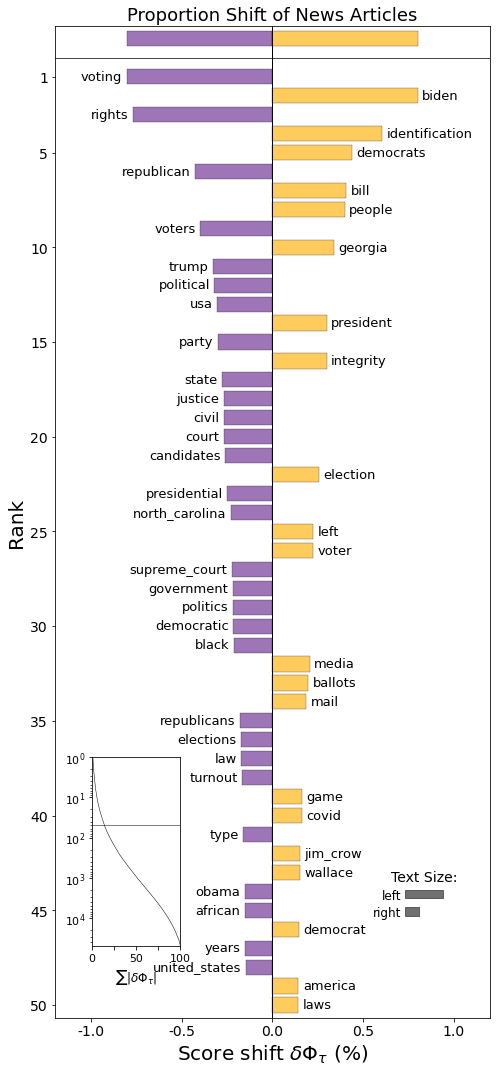

<AxesSubplot:title={'center':'Proportion Shift of News Articles'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [23]:
proportion_shift = sh.ProportionShift(type2freq_1=left_dic, type2freq_2=right_dic)
proportion_shift.get_shift_graph(system_names = ['left', 'right'], top_n=50, title='Proportion Shift of News Articles')

### Shannon entropy word shift

Proportion shifts are easy to interpret, but they are simplistic and have a difficult time pulling out interesting differences between two texts. For example, we see many “stop words” in the proportion shift. Instead, we can use the Shannon entropy to identify more “surprising” words and how they vary between two texts. The less often a word appears in a text, the more surprising that it is. The Shannon entropy can be interpreted as the average surprisal of a text. We can compare two texts by taking the difference between their entropies. We can rank these contributions and plot them as a Shannon entropy word shift. If the contribution is positive, then the word has a higher score in the second text. If the contribution is negative, then its score is higher in the first text.

C:\Users\analo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\shifterator\plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


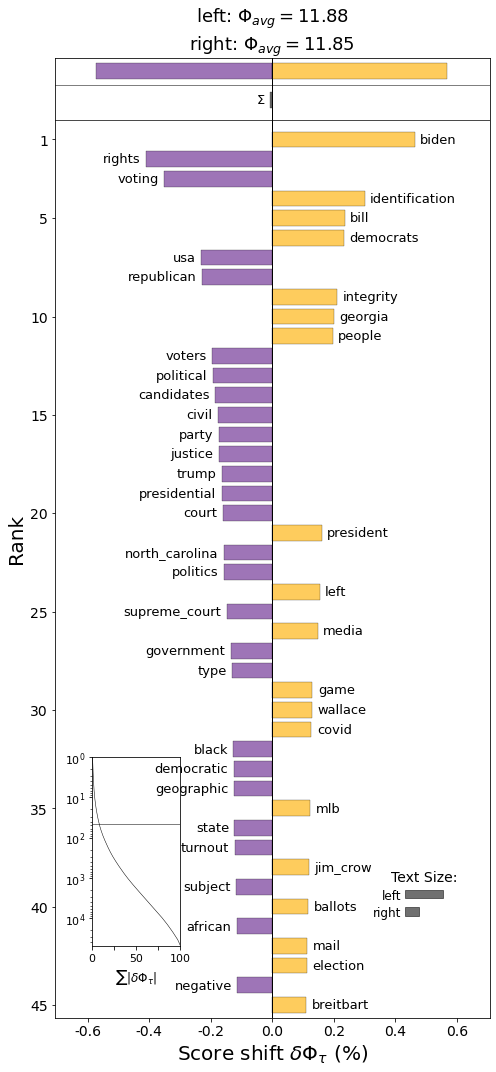

<AxesSubplot:title={'center':'left: $\\Phi_{avg}=$11.88\nright: $\\Phi_{avg}=$11.85'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [24]:
entropy_shift = sh.EntropyShift(type2freq_1=left_dic,
                                type2freq_2=right_dic,
                                base=2)
entropy_shift.get_shift_graph(system_names = ['left', 'right'], top_n=45)